In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [18]:
#read the dataset
Uber=pd.read_csv("Uber Request Data.csv")
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [19]:
Uber['Request timestamp'] = pd.to_datetime(Uber['Request timestamp'])
Uber['Drop timestamp'] = pd.to_datetime(Uber['Drop timestamp'])
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [20]:
Uber = Uber.drop(['Driver id'], axis = 1)

In [21]:
Uber.tail()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT
6744,6753,Airport,No Cars Available,2016-07-15 23:55:03,NaT


In [22]:
#unique pickup points
print(Uber['Pickup point'].unique())

['Airport' 'City']


In [23]:
Uber.shape

(6745, 5)

In [24]:
Uber.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Status             6745 non-null   object        
 3   Request timestamp  6745 non-null   datetime64[ns]
 4   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 210.8+ KB


In [25]:
Uber.isnull().sum(axis=0)

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [26]:
Uber[(Uber['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

In [27]:
#checking out duplicate values
len(Uber[Uber.duplicated()].index)

0

<AxesSubplot:xlabel='Status'>

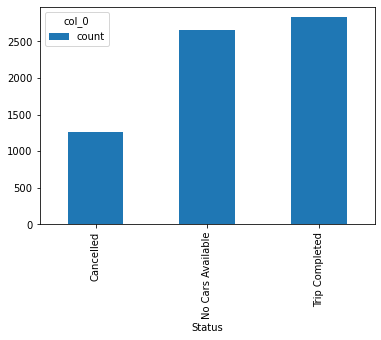

In [45]:
#visualising the status column
Status = pd.crosstab(index = Uber["Status"], columns="count")     
Status.plot.bar()

<AxesSubplot:xlabel='Pickup point'>

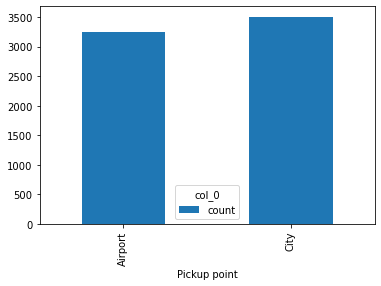

In [46]:
#visualising the pickup point column
Pick_point = pd.crosstab(index = Uber["Pickup point"], columns="count")     
Pick_point.plot.bar()

In [47]:
#grouping status and pickup point
Uber.groupby(['Status', 'Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

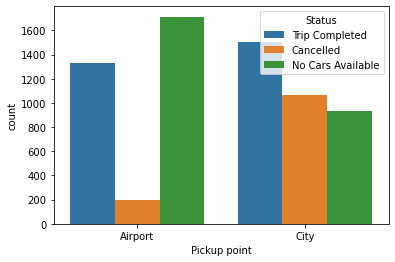

In [48]:
#visualising the status and pickup point
sns.countplot(x=Uber['Pickup point'],hue =Uber['Status'] ,data = Uber)

In [49]:
#bifurcating request and drop hours
Uber['Request Hour'] = Uber['Request timestamp'].dt.hour

In [50]:
Uber['Request Hour']

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request Hour, Length: 6745, dtype: int64

In [51]:
Uber['Request Time Slot'] = 'Early Morning'
Uber.loc[Uber['Request Hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
Uber.loc[Uber['Request Hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
Uber.loc[Uber['Request Hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Afternoon'
Uber.loc[Uber['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
Uber.loc[Uber['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'

In [52]:
Uber['Demand'] = 1

In [53]:
Uber['Supply'] = 0
Uber.loc[(Uber['Status'] == 'Trip Completed'),'Supply'] = 1

In [54]:
Uber['Gap'] = Uber['Demand'] - Uber['Supply']
Uber.loc[Uber['Gap']==0,'Gap'] = 'Trip Completed'
Uber.loc[Uber['Gap']==1,'Gap'] = 'Trip Not Completed'

In [55]:
#removing unwanted columns
Uber = Uber.drop(['Request Hour', 'Demand', 'Supply'], axis=1)

In [56]:
Uber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip Completed


<AxesSubplot:xlabel='Request Time Slot', ylabel='count'>

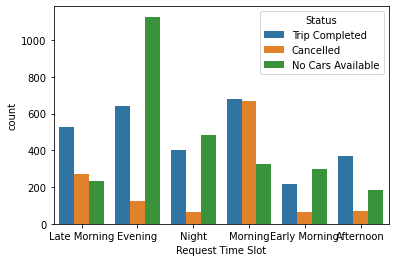

In [57]:
#visualize
sns.countplot(x=Uber['Request Time Slot'],hue =Uber['Status'] ,data = Uber)

<AxesSubplot:xlabel='Pickup point,Request Time Slot'>

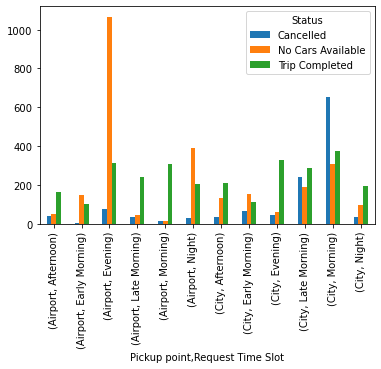

In [58]:
#plot of the status according to timeslots and pickup point
pickup_df = pd.DataFrame(Uber.groupby(['Pickup point','Request Time Slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

<AxesSubplot:xlabel='Gap', ylabel='count'>

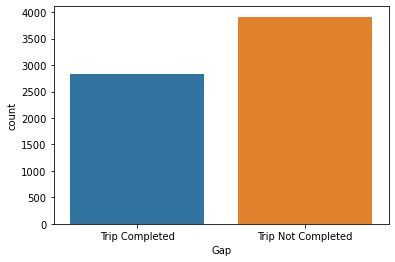

In [59]:
#count of trip completed and trip not completed
sns.countplot(x=Uber['Gap'], data = Uber)

<AxesSubplot:xlabel='Request Time Slot,Gap'>

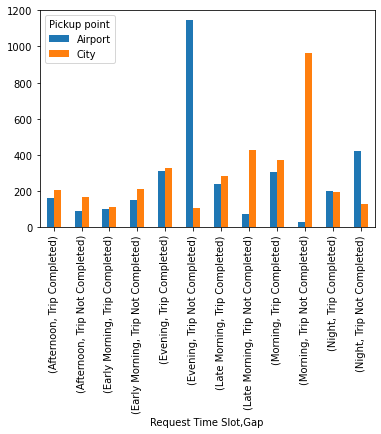

In [63]:
#plotting of count of the request which trip completed and trip not completed
gap_timeslot_df = pd.DataFrame(Uber.groupby(['Request Time Slot','Gap','Pickup point'])['Request id'].count().unstack(fill_value=0))
gap_timeslot_df.plot.bar()

<AxesSubplot:xlabel='Pickup point'>

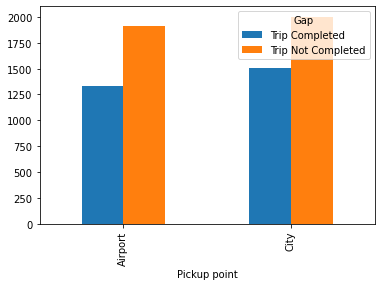

In [61]:
#plotting the count of request trip completed and trip not completed with pickup points
gap_pickup_df = pd.DataFrame(Uber.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_df.plot.bar()

<AxesSubplot:xlabel='Request Time Slot,Pickup point'>

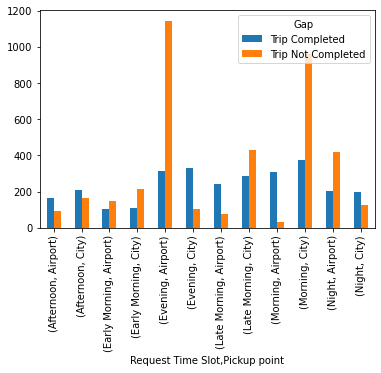

In [62]:
#plotting the count of request trip completed and trip not completed with timeslots and pickup point
gap_main_df = pd.DataFrame(Uber.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar()